In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= 10,6
from datetime import datetime


In [115]:
#data to look in this format and read the data.
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv("USCarrier_Traffic_20200916041109.csv",
                   parse_dates=['Period'],
                   date_parser=dateparse)

In [116]:
print(data.head())
print(data.tail())

      Period     Total
0 2000-01-01  49045412
1 2000-02-01  49306303
2 2000-03-01  60443541
3 2000-04-01  58286680
4 2000-05-01  60533783
        Period     Total
237 2019-10-01  88191029
238 2019-11-01  80993438
239 2019-12-01  90371414
240 2020-01-01  81512274
241 2020-02-01  74408383


In [61]:
print(type(data["Period"].iloc[1]))
print(type(data["Total"].iloc[1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int64'>


In [4]:
data.tail(10)

,Period,Total
232,2019-05-01,92967337
233,2019-06-01,98264448
234,2019-07-01,102282464
235,2019-08-01,98398085
236,2019-09-01,83798763
237,2019-10-01,88191029
238,2019-11-01,80993438
239,2019-12-01,90371414
240,2020-01-01,81512274
241,2020-02-01,74408383


PLOT THE ORIGINAL DATA

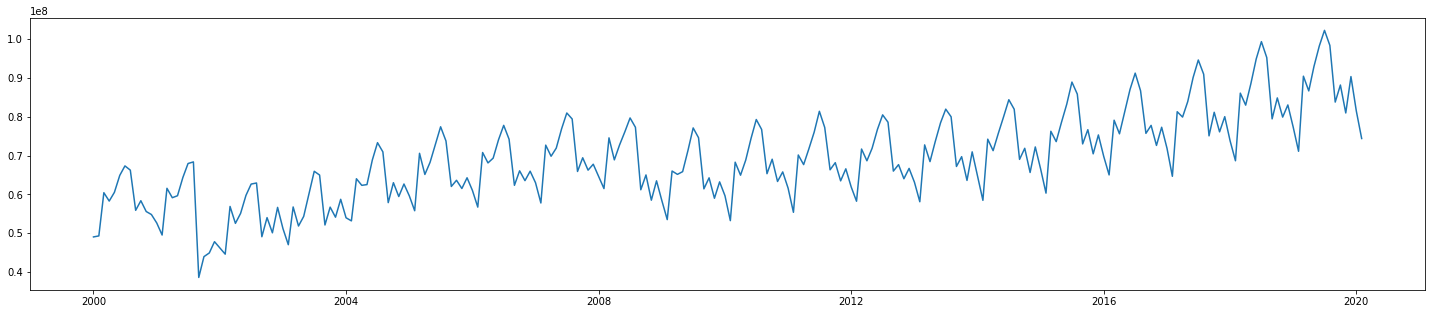

In [117]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(data.Period, data.Total, label="USCarriers")

DATA IS TRENDING AND IS SEASONAL

In [170]:
data.shape

(242, 2)

In [174]:
data

,Period,Total
0,2000-01-01,49045412
1,2000-02-01,49306303
2,2000-03-01,60443541
3,2000-04-01,58286680
4,2000-05-01,60533783
...,...,...
237,2019-10-01,88191029
238,2019-11-01,80993438
239,2019-12-01,90371414
240,2020-01-01,81512274


we will check if the data is stationary or not by rolling mean(Moving Average) and rolling Std Dev(Standard Deviation)

In [118]:

rolmean=data.rolling(window=12).mean()
rolsd=data.rolling(window=12).std()
rolmean
print(rolsd)

            Total
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
..            ...
237  9.318202e+06
238  9.242125e+06
239  9.141911e+06
240  8.753066e+06
241  8.182824e+06

[242 rows x 1 columns]


data1 = dataframe with dates as index......
data = original dataframe with 2 columns

In [119]:
# data.plot(kind="line")
data1 = data.set_index("Period", inplace=False)

               Total
Period              
2000-01-01  49045412
2000-02-01  49306303
2000-03-01  60443541
2000-04-01  58286680
2000-05-01  60533783
...              ...
2019-10-01  88191029
2019-11-01  80993438
2019-12-01  90371414
2020-01-01  81512274
2020-02-01  74408383

[242 rows x 1 columns]


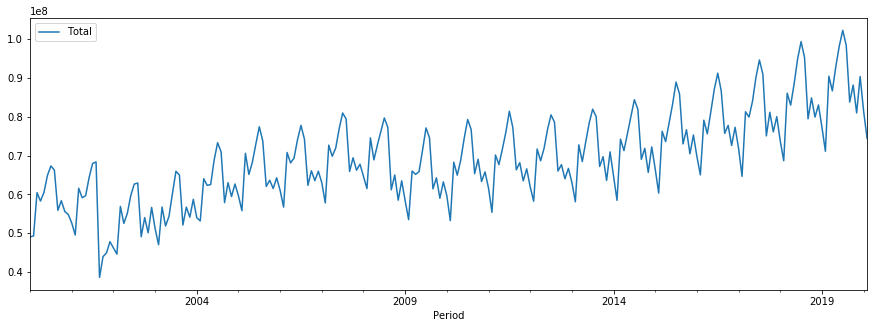

In [120]:
print(data1)
data1.plot(kind="line", figsize=(15,5))

In [105]:
# #plot original, 
# # fig, ax = plt.subplots(figsize=(25, 5))
# data1.plot(kind="line",label="Orginal",figsize=(15,5))  

# rolmean.plot(kind="line",figsize=(15,5),color='red') # These are just series without dates 
# rolsd.plot(kind="line",figsize=(15,5),color='yellow') #won't get the X-axis as dates after plotting these


Plot the original data with the rolling mean and standard deviation

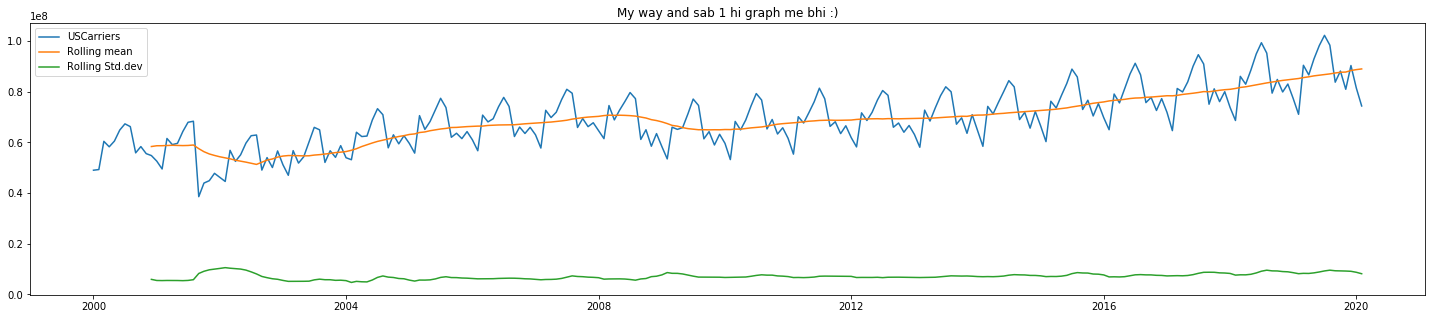

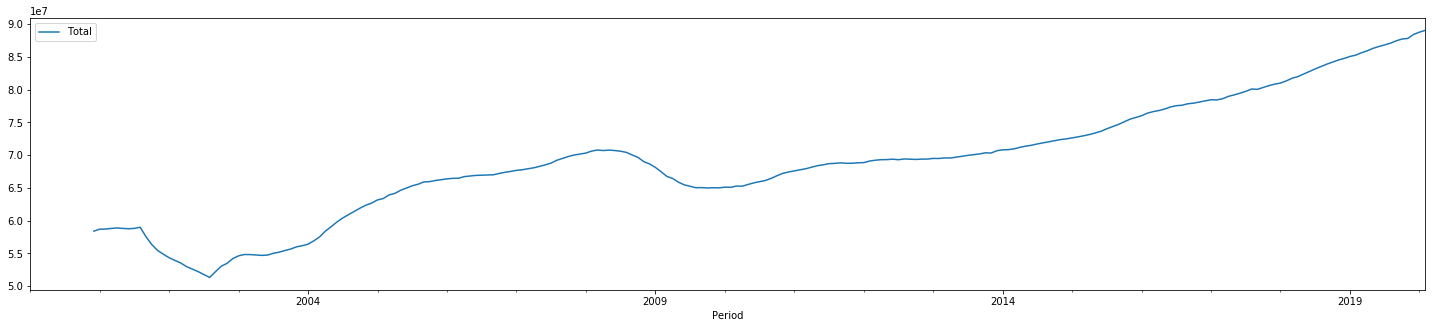

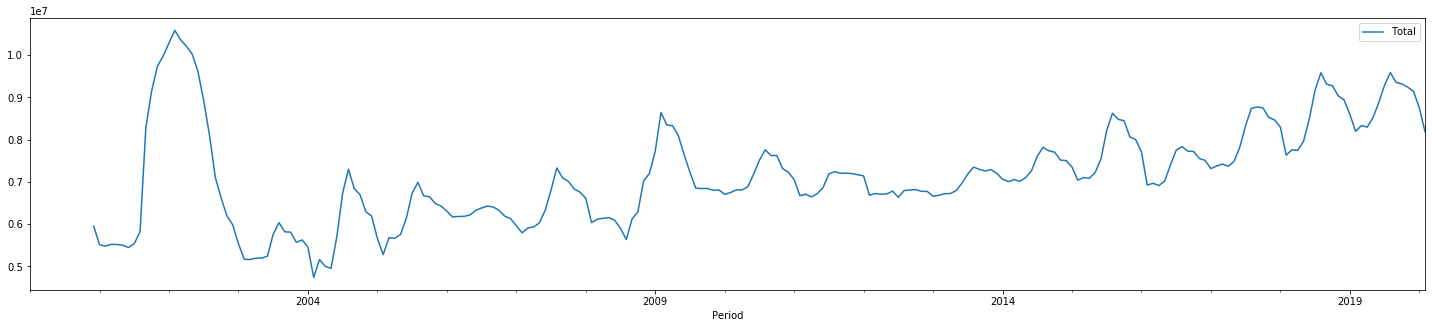

In [121]:

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(data.Period, data.Total, label="USCarriers")
ax.plot(data.Period, rolmean, label="Rolling mean")
ax.plot(data.Period, rolsd, label="Rolling Std.dev")
ax.set_title("My way and sab 1 hi graph me bhi :)")
plt.legend()

# Or re-index them to have the data1's index (dates) as their index
rolmean.set_index(data.Period, inplace=True)
rolsd.set_index(data.Period, inplace=True)
rolmean.plot(kind="line", figsize=(25, 5))
rolsd.plot(kind="line", figsize=(25, 5))

Moving Average and Standard deviation should be constant for all years to be stationary. Here it is not constant.
Hence the data is not stationary 

In [122]:
train1=data1[0:193] 
test=data1[193:]

In [123]:
train1

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783
...,...
2015-09-01,73017729
2015-10-01,76678056
2015-11-01,70460064


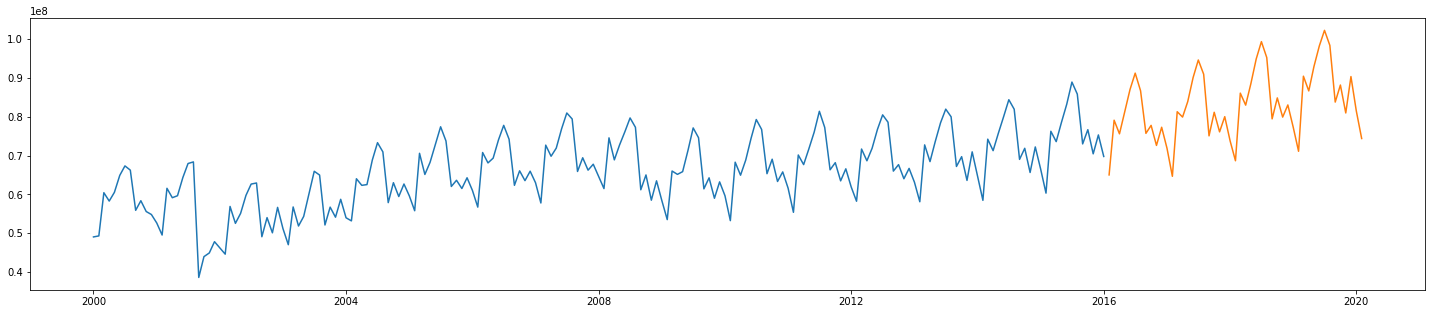

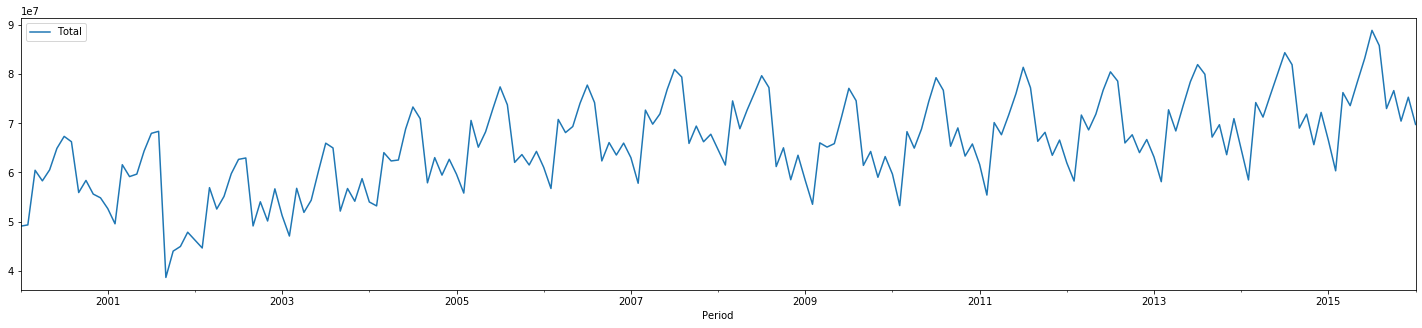

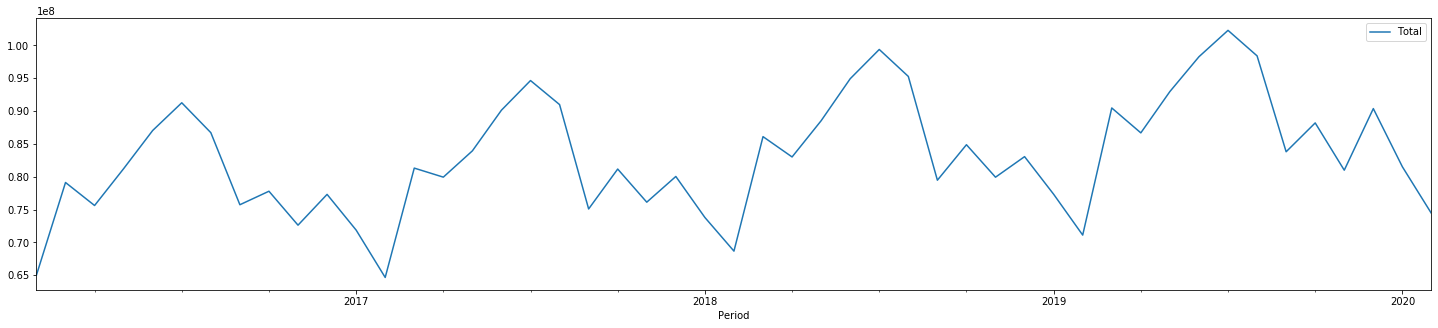

In [124]:
#plotting the train and test data.
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train1.index.values, train1.Total, label="train")
ax.plot(test.index.values, test.Total,label='test')

# OR

train1.plot(kind="line", figsize=(25, 5))
test.plot(kind="line", figsize=(25, 5))  # best to plot 1 plot quickly


Model Building.

# Holt winter's exponential smoothing

In [127]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Additive

In [147]:
train = train1["Total"]
hexpo = ExponentialSmoothing(train, trend='add',seasonal="add").fit()

Hwexpo=hexpo.forecast(49)

C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [151]:
hexpo.summary() #additive

Dep. Variable:,endog,No. Observations:,193
Model:,ExponentialSmoothing,SSE,19137909355728000.000
Optimized:,True,AIC,6251.957
Trend:,Additive,BIC,6304.160
Seasonal:,Additive,AICC,6255.888
Seasonal Periods:,12,Date:,"Wed, 07 Oct 2020"
Box-Cox:,False,Time:,22:21:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,True
smoothing_slope,0.000000,beta,True


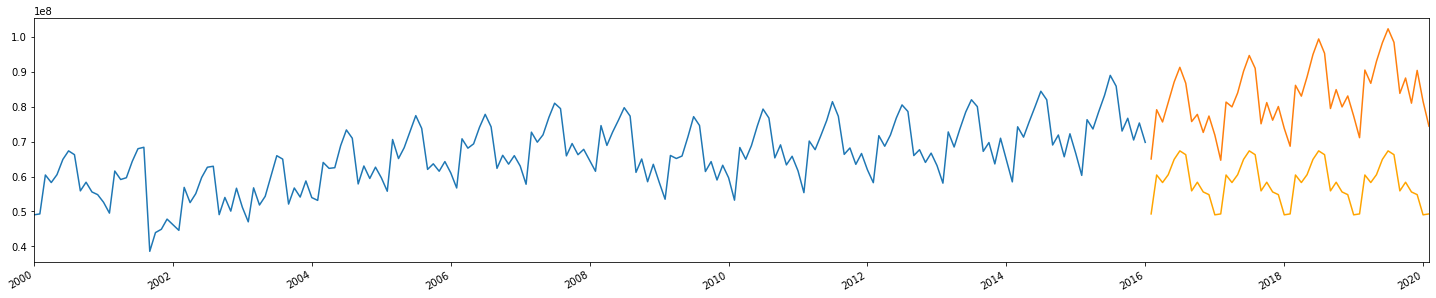

In [129]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train1.index.values, train1.Total, label="train")
ax.plot(test.index.values, test.Total,label='test')
Hwexpo.plot(kind="line",color='orange')

In [16]:
#hes = hexpo.forecast(49)
#hes

Multiplicative

In [149]:
train = train1["Total"]
hmexpo = ExponentialSmoothing(train, trend='add',seasonal="mul").fit()

hmulexpo=hexpo.forecast(49)

C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [150]:
hmexpo.summary() #multiplicative

Dep. Variable:,endog,No. Observations:,193
Model:,ExponentialSmoothing,SSE,642990966976953.375
Optimized:,True,AIC,5597.051
Trend:,Additive,BIC,5649.254
Seasonal:,Multiplicative,AICC,5600.982
Seasonal Periods:,12,Date:,"Wed, 07 Oct 2020"
Box-Cox:,False,Time:,22:21:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6503149,alpha,True
smoothing_slope,0.0012968,beta,True


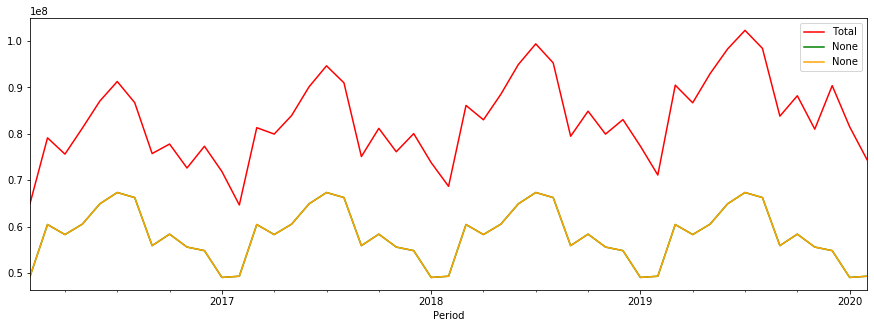

In [155]:

#train.plot(kind="line", figsize=(15,5))
#test.plot(kind="line", color="red",figsize=(15,5), legend="Test")
hmulexpo.plot(kind="line",color="green", figsize=(15,5), legend="Multiplicative")

Hwexpo.plot(kind="line",color="orange", figsize=(15,5), legend="Additive")


In [156]:
#hexpo.summary() #check for multiplicative AIC

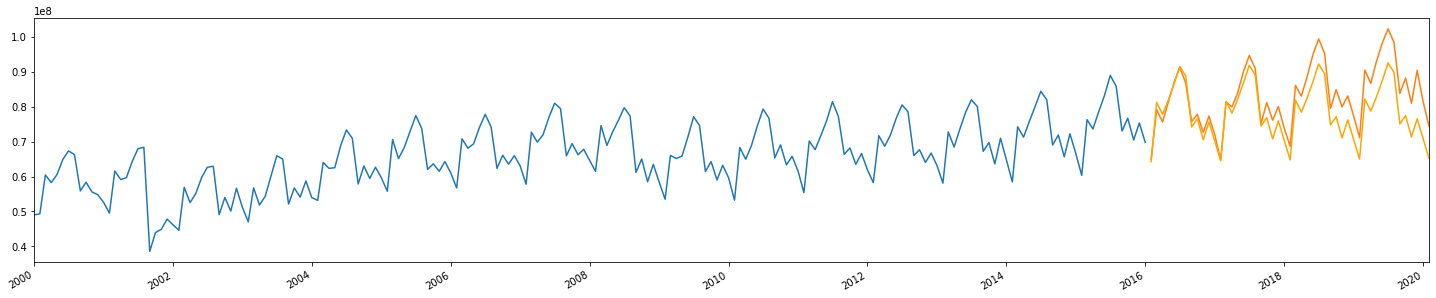

In [40]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train1.index.values, train1.Total, label="train")
ax.plot(test.index.values, test.Total,label='test')
hmulexpo.plot(kind="line",color='orange')

In [157]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

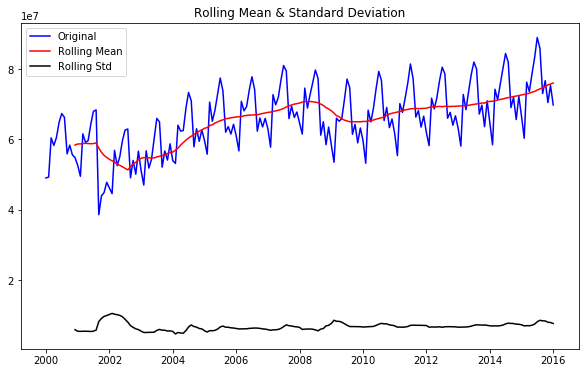

Results of Dickey-Fuller Test:
Test Statistic                  -0.773021
p-value                          0.826919
#Lags Used                      13.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64


In [158]:
test_stationarity(train) #with index

In [ ]:
#P value is 0.82 which is more than 0.05. it is not stationary. MAKE IT STATIONARY

In [159]:
diff1=train.diff()
diff1=diff1.dropna()

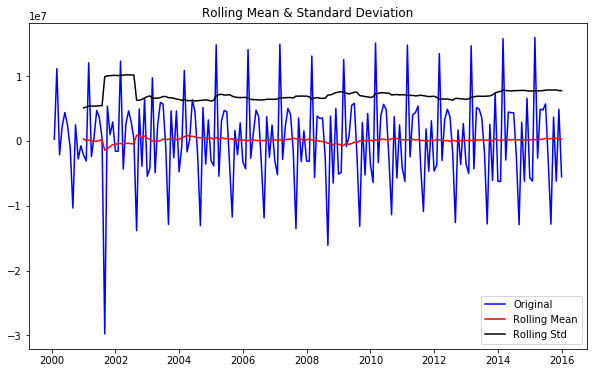

Results of Dickey-Fuller Test:
Test Statistic                  -3.518005
p-value                          0.007537
#Lags Used                      12.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64


In [160]:
test_stationarity(diff1)

In [91]:
#Ho gaya stationary. D is lags which is 1

In [161]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

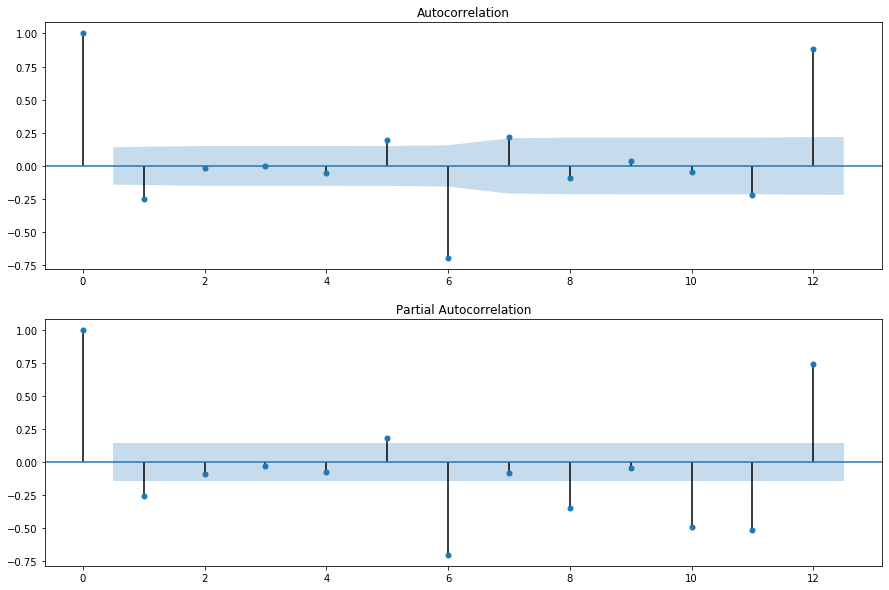

In [162]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [145]:
from statsmodels.tsa.arima_model import ARIMA

In [146]:
model = ARIMA(train, order=(1,1,1))
model_fit=model.fit(disp=True)
print(model_fit.summary())
arimaplot=model_fit.forecast(49)[0]
arimaplot = pd.DataFrame(arimaplot,index = test.index,columns=['Prediction'])




C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3271.124
Method:                       css-mle   S.D. of innovations        6003493.638
Date:                Wed, 07 Oct 2020   AIC                           6550.248
Time:                        21:58:23   BIC                           6563.278
Sample:                    02-01-2000   HQIC                          6555.525
                         - 01-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.08e+05   1.77e+04      6.093      0.000    7.32e+04    1.43e+05
ar.L1.D.Total     0.5687      0.061      9.399      0.000       0.450       0.687
ma.L1.D.Total    -0.9999      0.021    -

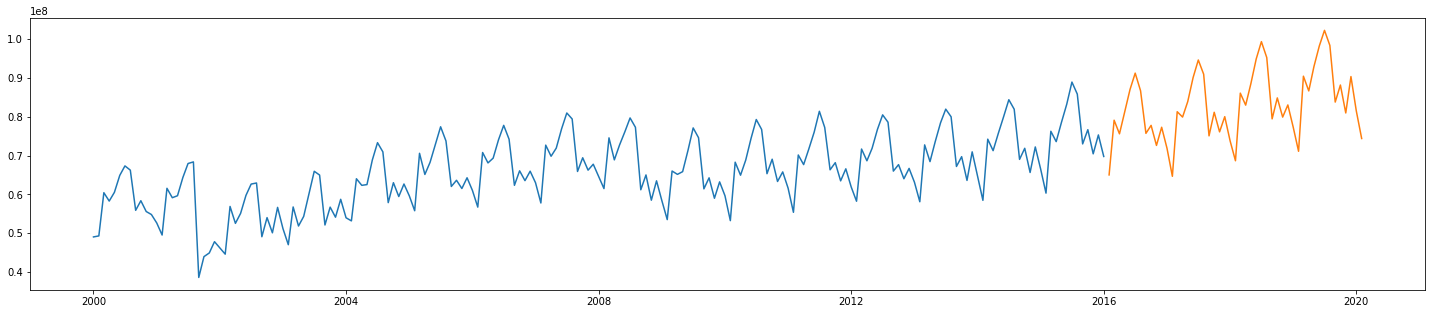

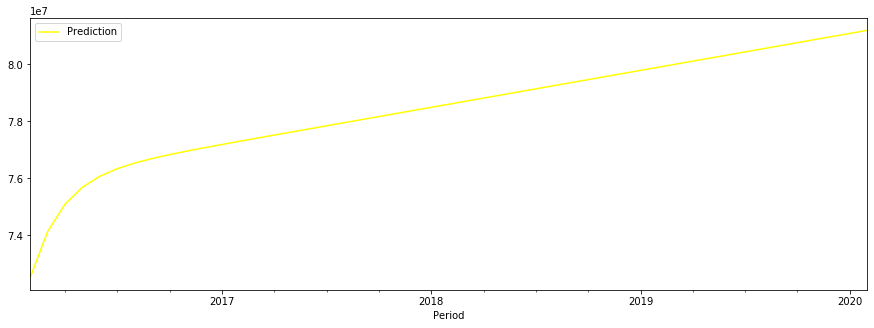

In [163]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(train1.index.values, train1.Total, label="train")
ax.plot(test.index.values, test.Total,label='test')
arimaplot.plot(kind="line",color="yellow", figsize=(15,5), legend="arima")


# test.plot(kind="line",color="blue",legend="test")

# hmulexpo.plot(kind="line",color="green", figsize=(15,5), legend="Multiplicative")


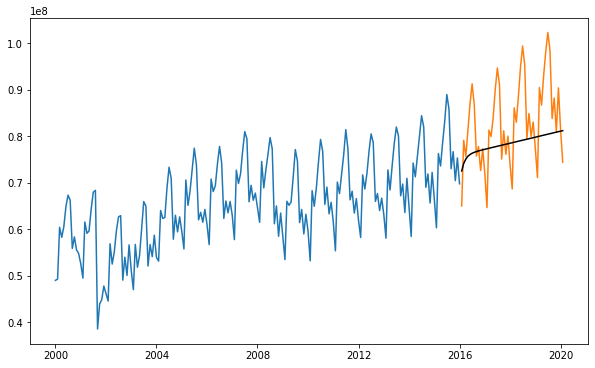

In [164]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arimaplot, label='Prediction', color='black')
plt.show()

In [ ]:
#arimax

In [165]:
import statsmodels.api as sm

In [166]:
diffs1=train.diff(12)
diffs1=diffs1.dropna()

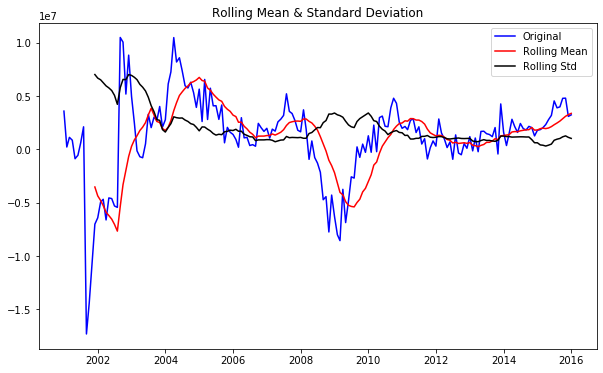

Results of Dickey-Fuller Test:
Test Statistic                  -3.009186
p-value                          0.034045
#Lags Used                      14.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [167]:
test_stationarity(diffs1)

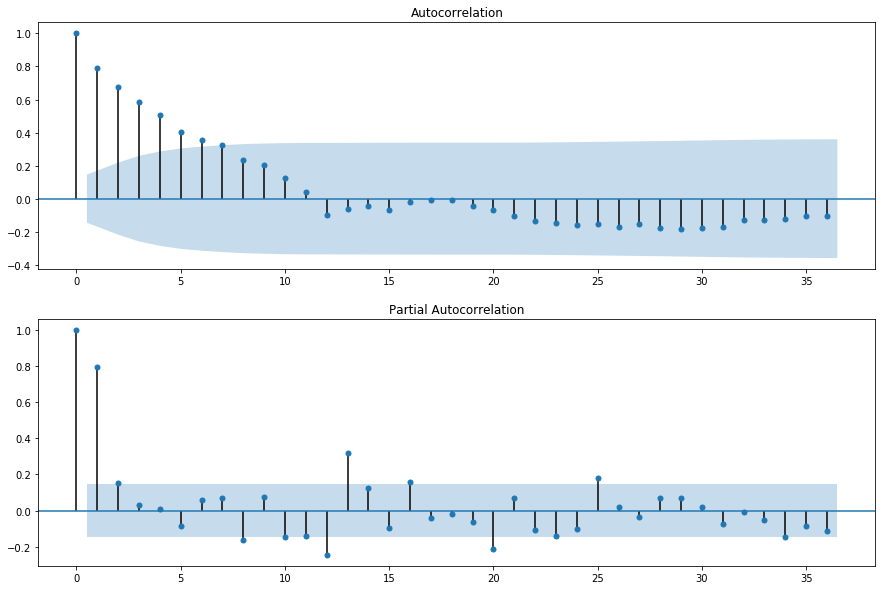

In [88]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=36)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=36)
pyplot.show()

In [168]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(train, order=(2,2,2), seasonal_order=(1,1,1,12))

C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [169]:
model_fit=model.fit(disp=True)
print(model_fit.summary())
sarima=model_fit.forecast(49)

C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hema Jalmoru\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Total   No. Observations:                  193
Model:             SARIMAX(2, 2, 2)x(1, 1, 1, 12)   Log Likelihood               -2881.803
Date:                            Thu, 08 Oct 2020   AIC                           5777.607
Time:                                    00:27:22   BIC                           5799.919
Sample:                                01-01-2000   HQIC                          5786.654
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1082      0.920     -1.205      0.228      -2.911       0.695
ar.L2         -0.2078      0.254   

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
Arima =  mean_squared_error(y_true=test,y_pred=arimaplot) #for arima
sarima = mean_squared_error(y_true=test,y_pred=sarima) #for sarima
holdwinter_multiplicative = mean_squared_error(y_true=test,y_pred=hmulexpo) #for holdwinter multiplicative
holdwinter_additive = mean_squared_error(y_true=test,y_pred=Hwexpo) #for holwinter additive

In [171]:
import math
print("Arima RMSE:", math.sqrt(Arima))
print("Sarima RMSE:", math.sqrt(sarima))
print("holdwinter_multiplicative:", math.sqrt(holdwinter_multiplicative))
print("holdwinter_additive:", math.sqrt(holdwinter_additive))

Arima RMSE: 9494498.075368734
Sarima RMSE: 4049332.091617241
holdwinter_multiplicative: 25409578.81871143
holdwinter_additive: 25409578.81871143


In [ ]:
# holtwinter plot.
# holtwinter multipicative and additional alag alag
# Arima 
#Sarimax
#Auto-Arima